Group: Seunghyeon (Hyeon) Kim

1. Create Stochastic block model with 2 and three equal sized components for a system of size 90 nodes
2. In the SBM matrix set the  diagonal to 𝑝
 and the off diagonal elements to 1−𝑝
3. Once the network is created measure the communities using greedy modularity
4. Plot the Jaccard and Rand index as function of 𝑝

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [8]:
def SBMM (p):
  return np.array([[p, 1-p, 1-p],[1-p, p, 1-p], [1-p, 1-p, p]])

sizes = np.array([30,30,30]) #sizes of the components
c = [0] * sizes[0] + [1] * sizes[1] + [2] * sizes[2] #for coloring
communities = [np.arange(sizes[:i].sum(),sizes[:i+1].sum()) for i in range(len(sizes))] # for modularity
probs = SBMM(0.7) # probability matrix
G = nx.stochastic_block_model(sizes, probs, seed=0)

In [18]:
def Stochastic_b_SBMM(p):
  sizes = np.array([30,30,30]) #sizes of the components
  c = [0] * sizes[0] + [1] * sizes[1] + [2] * sizes[2] #for coloring
  communities = [np.arange(sizes[:i].sum(),sizes[:i+1].sum()) for i in range(len(sizes))] # for modularity
  probs = SBMM(p) # probability matrix
  G = nx.stochastic_block_model(sizes, probs, seed=0)
  comm = nx.community.greedy_modularity_communities(G)
  c2 = []
  for i in range(len(G.nodes)):
      for j in range(len(comm)):
          if i in comm[j]:
              c2.append(j)
  return [a[1,1]/(a[1,1]+a[0,1]+a[1,0]), (a[1,1]+a[0,0])/(a[1,1]+a[0,0]+a[0,1]+a[1,0])]

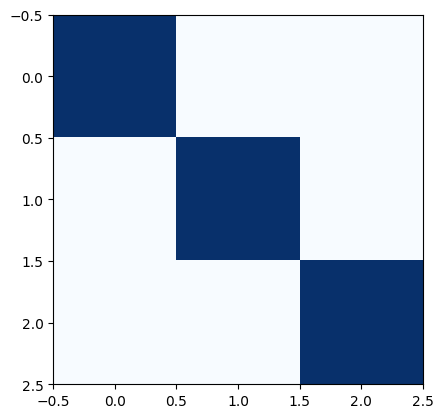

In [9]:
plt.imshow(probs,cmap='Blues');

In [10]:
comm = nx.community.greedy_modularity_communities(G)

In [11]:
print(nx.community.modularity(G,communities))
print(nx.community.modularity(G,comm))

0.19467454444461807
0.18967060934394628


In [14]:
c2 = []
for i in range(len(G.nodes)):
    for j in range(len(comm)):
        if i in comm[j]:
            c2.append(j)

In [15]:
a = np.zeros((2,2), dtype=int)
nodes = list(G.nodes())

In [16]:
for i in nodes:
  for j in nodes:
    if i == j: continue
    if c[i] == c[j]:
      i1 = 1
    else:
      i1 = 0
    if c2[i] == c2[j]:
      i2 = 1
    else:
      i2 = 0
    a[i1][i2] += 1
print(a)

[[5282  118]
 [ 116 2494]]


In [19]:
JaccInd = a[1,1]/(a[1,1]+a[0,1]+a[1,0])
RandInd = (a[1,1]+a[0,0])/(a[1,1]+a[0,0]+a[0,1]+a[1,0])

In [22]:
p_range = np.arange(0,1.01,0.01)
JaccInds = []
RandInds = []
for p in p_range:
  JaccInds.append(Stochastic_b_SBMM(p)[0])
  RandInds.append(Stochastic_b_SBMM(p)[1])


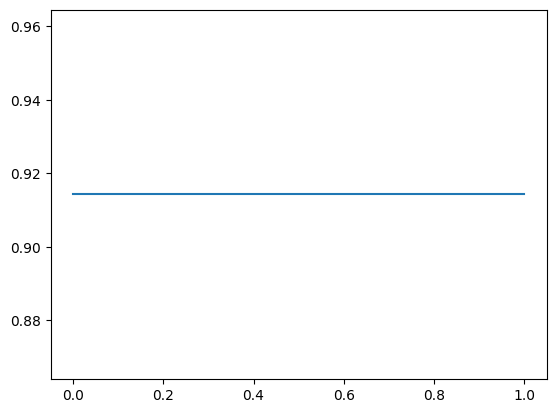

In [23]:
plt.plot(p_range, JaccInds, label='Jaccard Index')

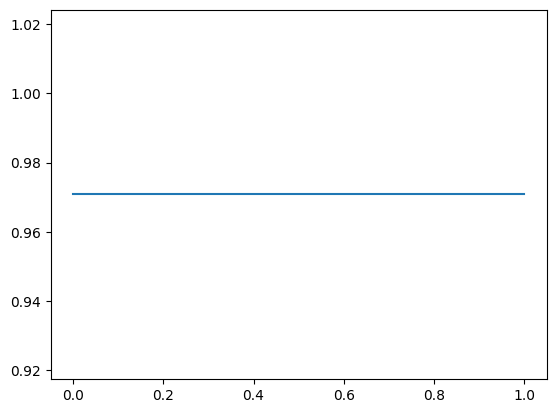

In [24]:
plt.plot(p_range, RandInds, label='Rand Index')